# Library Importation

In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_score
from sklearn import metrics 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE as imblearn_SMOTE
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from imblearn.over_sampling import SMOTE




# Data Importation

In [2]:
#Dataset Importation
df = pd.read_csv("Bank_Personal_Loan.csv")

# Initial Data Analysis

In [3]:
# Checking head of dataset (first 10 rows of the dataset).
df.head(n=10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0/30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0/60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8/90,3,0,1,0,0,0,0


In [4]:
#displaying the shape
df.shape

(5000, 14)

In [5]:
#basic statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.3384,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.7742,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.00,2.0,3.00,4.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.00,0.0,0.00,1.0


In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [8]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# finding unique values in the column
for column_name in df.columns:
    print("*******************************************************************", column_name, "************************************************************************")
    print()
    print(set(df[column_name].tolist()))
    print()



******************************************************************* ID ************************************************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

In [10]:
#Checking column names
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [12]:

df['Income'] = df['Income'] / 12





In [13]:

# Replace negative values with NaN
df['Experience'] = np.where(df['Experience'] < 0, np.nan, df['Experience'])

# Impute NaN values with the mean or median
df['Experience'].fillna(df['Experience'].mean(), inplace=True)


In [14]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
#Remove rows with Negative values

df = df[df['Experience'] >= 0]


# EXPLORATORY DATA ANALYSIS(EDA)


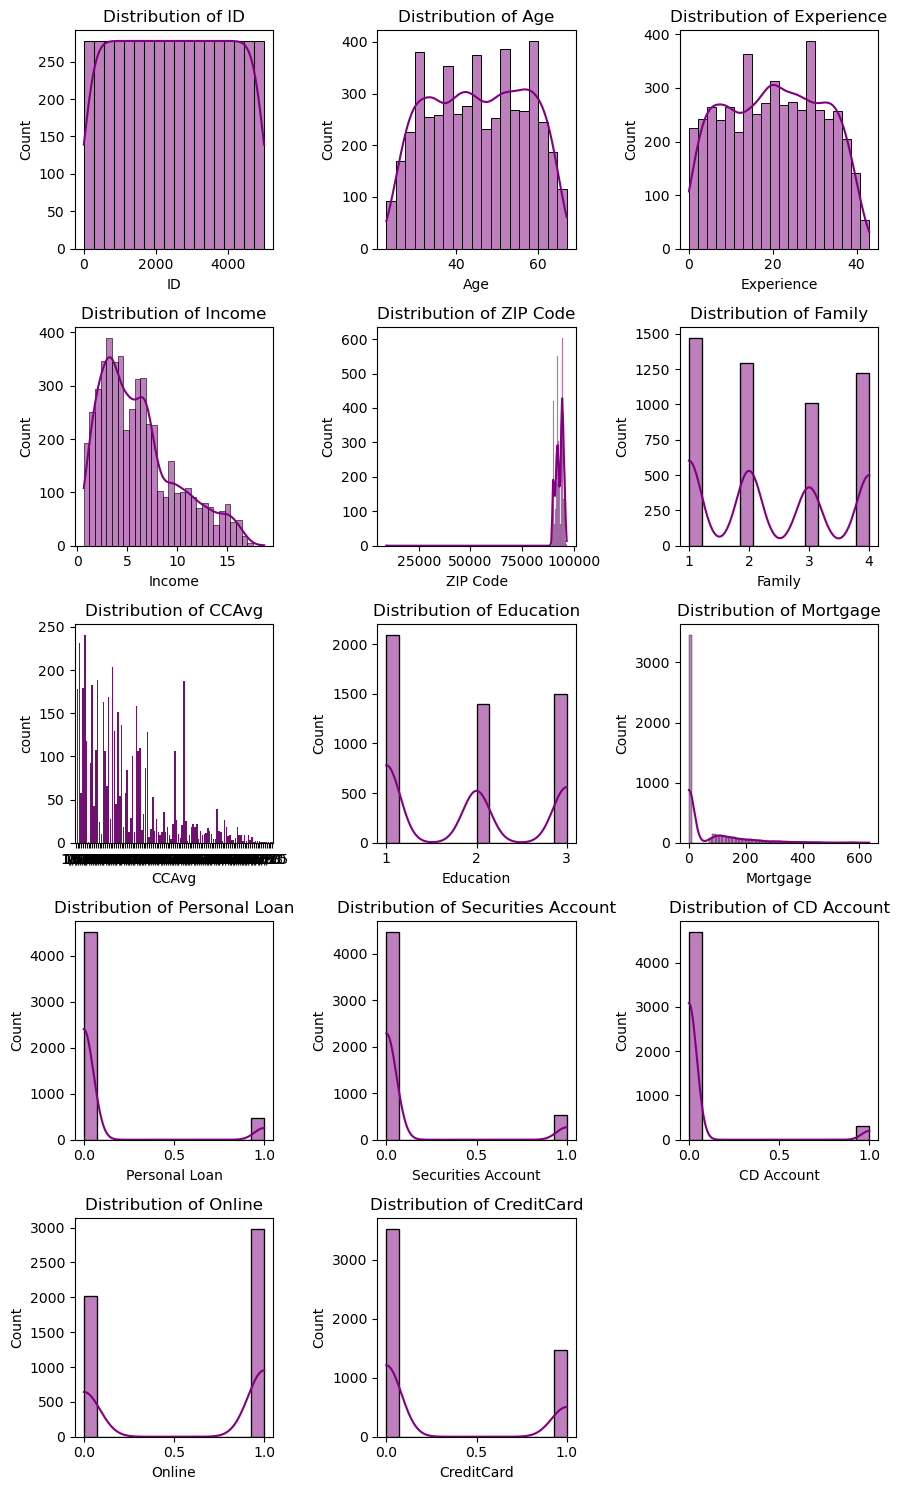

In [16]:
# Plotting distribution of each column in the dataset
# Defining the number of rows and columns for the grid
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols
# Creating a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 3*num_rows))
# Flatten the axes array
axes = axes.flatten()
# Iterating over each column in the DataFrame
for i, column in enumerate(df.columns):
    ax = axes[i]  # Get the subplot axes
    if df[column].dtype == 'object':
        # Categorical variable, plot count plot
        sns.countplot(x=column, data=df, ax=ax, color='purple')
    else:
        # Numerical variable, plot histogram
        sns.histplot(x=column, data=df, kde=True, ax=ax, color='purple')
    ax.set_title(f"Distribution of {column}")
# Remove empty subplots
for i in range(len(df.columns), num_rows * num_cols):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
# save image to include in pdf
plt.savefig('Distribution of each Feature.jpg') 
plt.show()


## UNIVARIATE ANALYSIS

In [17]:
numeric_stats = df.describe()
print(numeric_stats)


                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.331043     6.147850  93152.503000   
std    1443.520003    11.463166    11.252985     3.836144   2121.852197   
min       1.000000    23.000000     0.000000     0.666667   9307.000000   
25%    1250.750000    35.000000    11.000000     3.250000  91911.000000   
50%    2500.500000    45.000000    20.331043     5.333333  93437.000000   
75%    3750.250000    55.000000    30.000000     8.166667  94608.000000   
max    5000.000000    67.000000    43.000000    18.666667  96651.000000   

            Family    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.881000    56.498800       0.096000   
std       1.147663     0.839869   101.713802       0.294621   
min       1.000000     1.000000     0.000000       0.000000   
25%      

In [18]:
categorical_features = df.drop(columns=['Age','Income','Experience','CCAvg','Mortgage'])
categorical_features

,ID,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,91107,4,1,0,1,0,0,0
1,2,90089,3,1,0,1,0,0,0
2,3,94720,1,1,0,0,0,0,0
3,4,94112,1,2,0,0,0,0,0
4,5,91330,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4995,4996,92697,1,3,0,0,0,1,0
4996,4997,92037,4,1,0,0,0,1,0
4997,4998,93023,2,3,0,0,0,0,0
4998,4999,90034,3,2,0,0,0,1,0


In [19]:
continuous_features = df.drop(columns=['ZIP Code','Family','Education','Securities Account','CD Account'
                                       ,'Online','CreditCard', 'ID'])


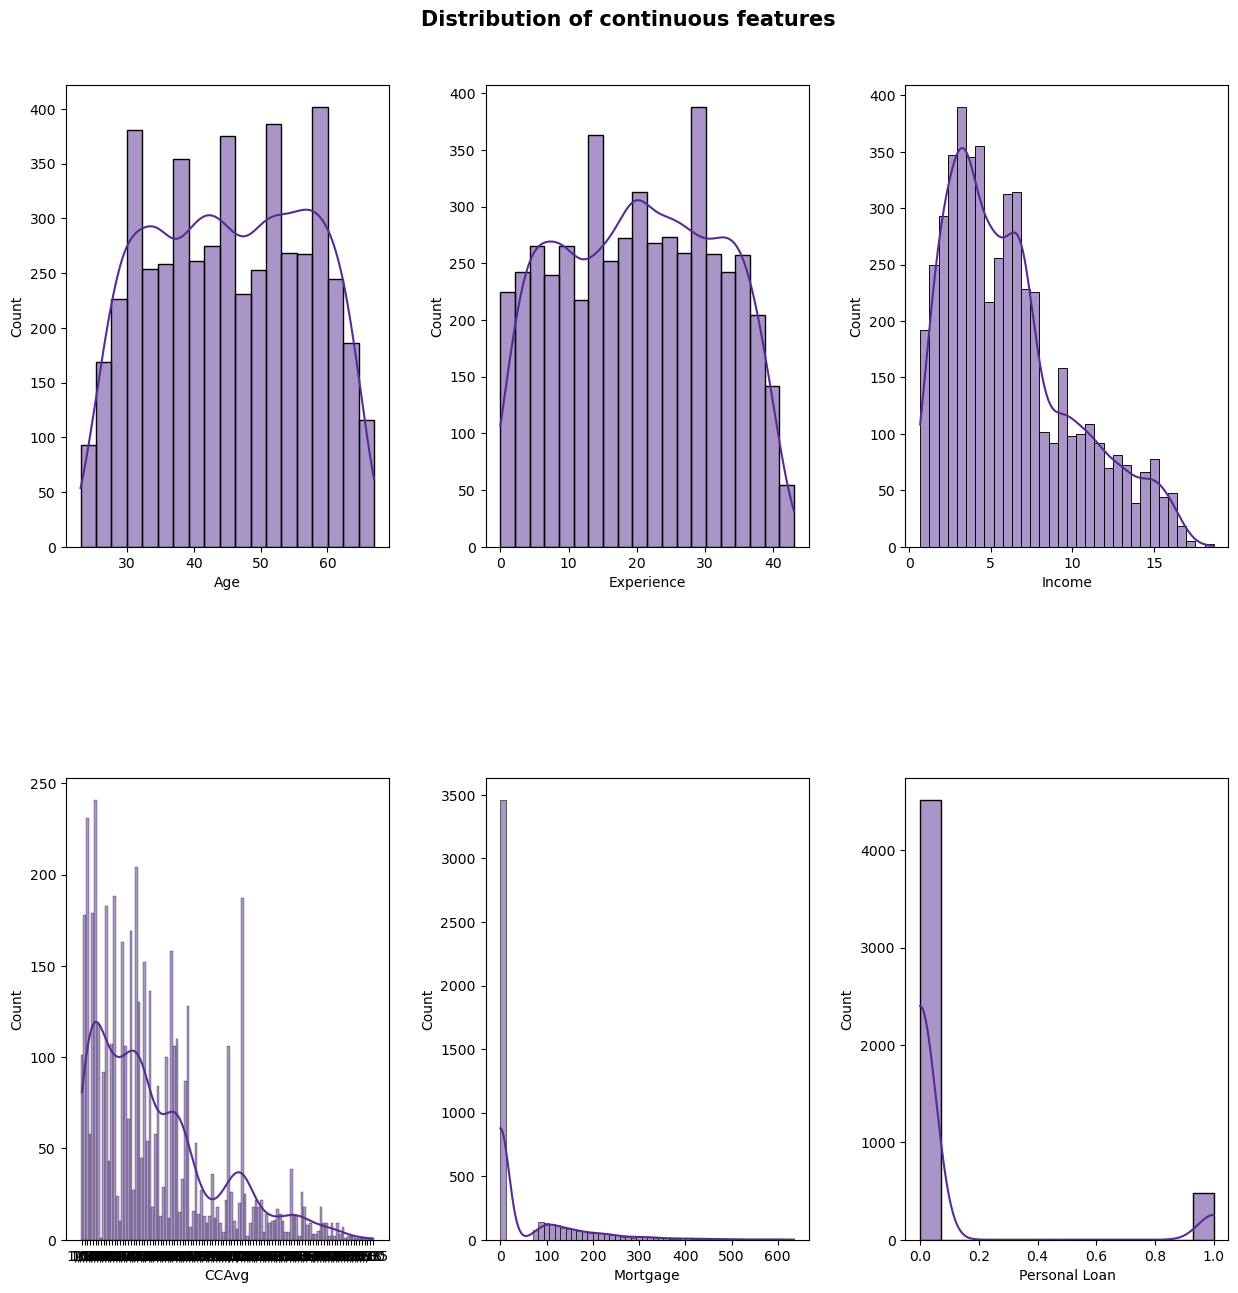

In [20]:


sns.set_palette("Purples_r")  # Use "Purples" for regular order, "Purples_r" for reversed order
fig, ax = plt.subplots(2, 3, figsize=(15, 15), gridspec_kw={"hspace": 0.5, "wspace": 0.3})

for i, col in enumerate(continuous_features):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])

fig.suptitle('Distribution of continuous features', fontsize=15, fontweight='bold', y=0.93)
plt.show()


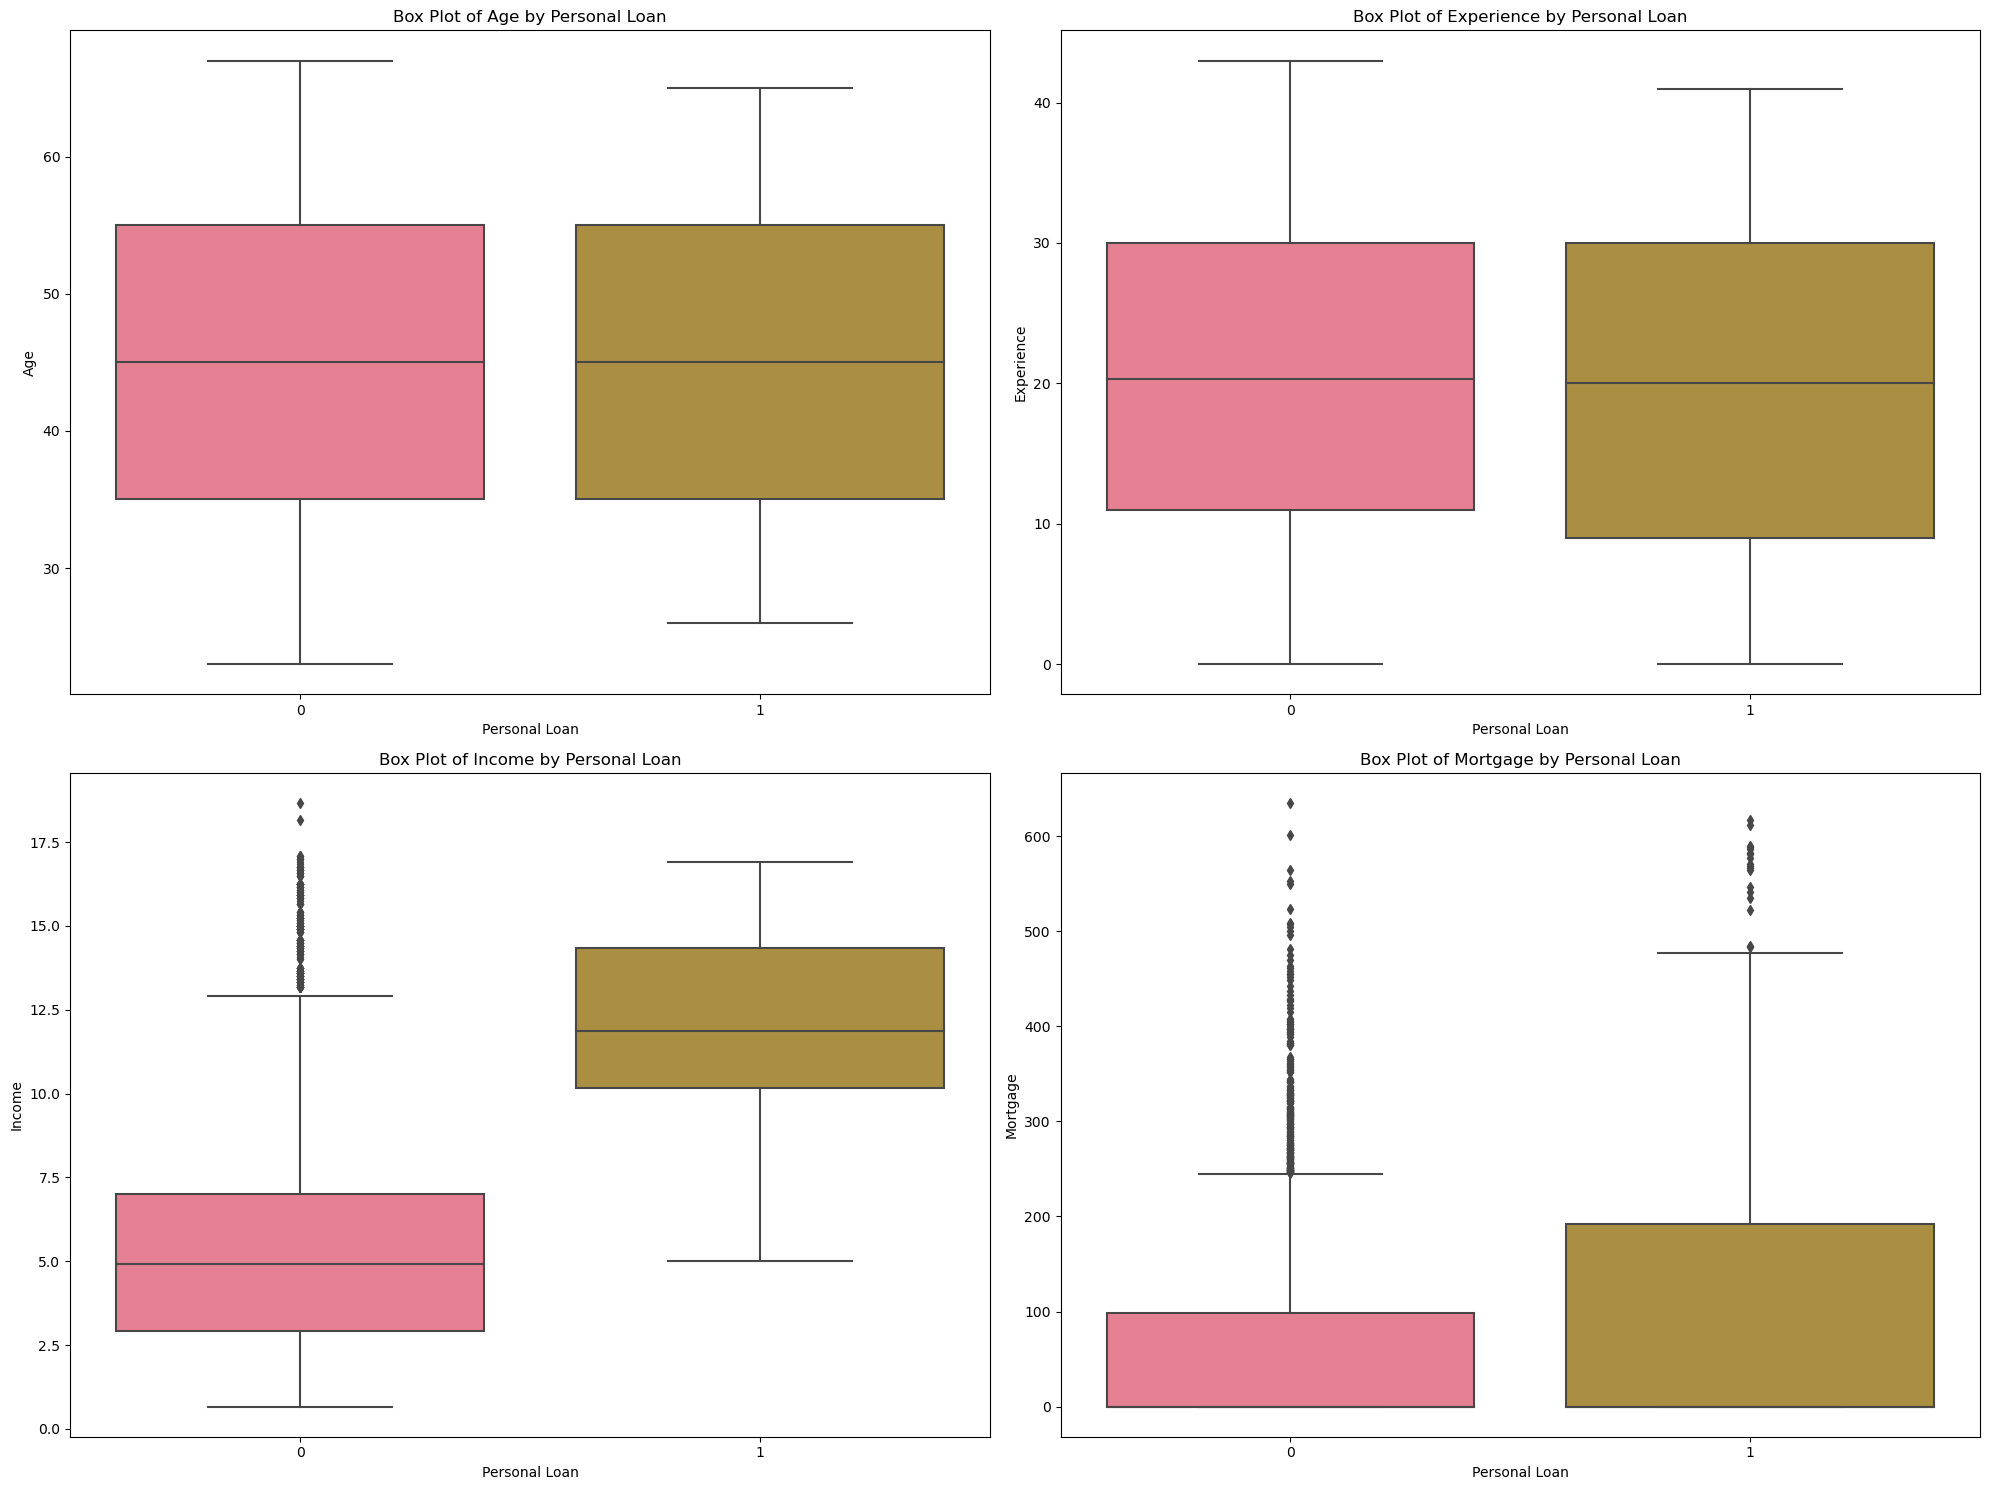

In [21]:
purple_palette = sns.color_palette("husl")

# Create a single figure to hold all the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot Age vs Personal Loan
sns.boxplot(ax=axes[0, 0], x="Personal Loan", y="Age", data=df, palette=purple_palette)
axes[0, 0].set_title('Box Plot of Age by Personal Loan')

# Plot Experience vs Personal Loan
sns.boxplot(ax=axes[0, 1], x="Personal Loan", y="Experience", data=df, palette=purple_palette)
axes[0, 1].set_title('Box Plot of Experience by Personal Loan')

# Plot Income vs Personal Loan
sns.boxplot(ax=axes[1, 0], x="Personal Loan", y="Income", data=df, palette=purple_palette)
axes[1, 0].set_title('Box Plot of Income by Personal Loan')

# Plot Mortgage vs Personal Loan
sns.boxplot(ax=axes[1, 1], x="Personal Loan", y="Mortgage", data=df, palette=purple_palette)
axes[1, 1].set_title('Box Plot of Mortgage by Personal Loan')

# Adjust layout
plt.tight_layout()

plt.savefig('BoxPlots_All_Variables.jpg')

# Show all the plots
plt.show()

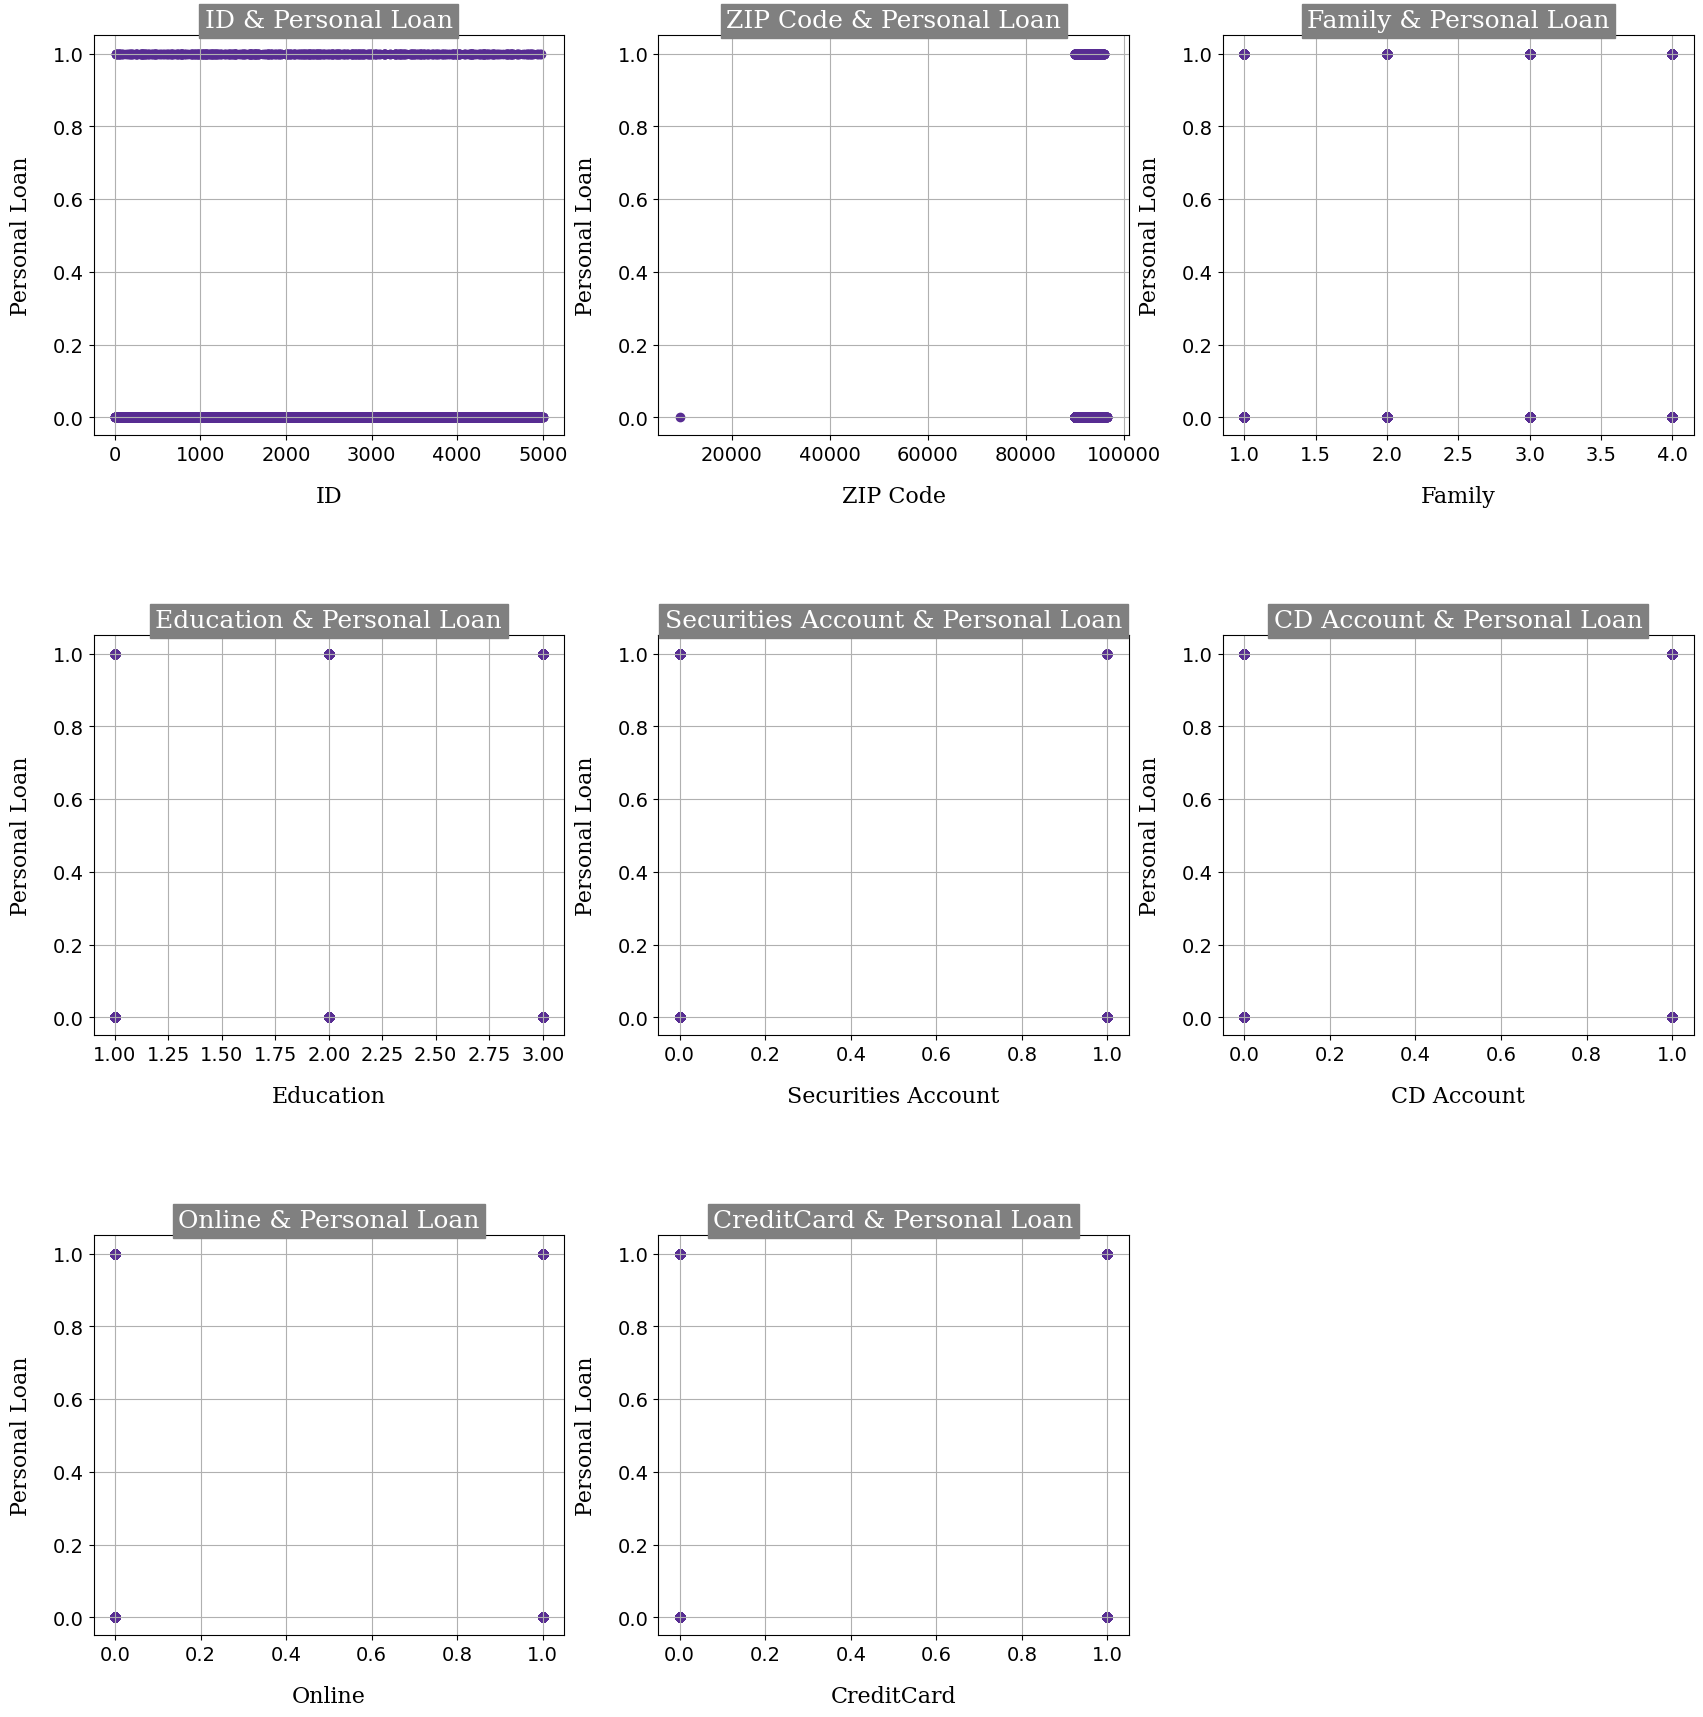

In [22]:

font1 = {'family': 'serif', 'size': 18}
font2 = {'family': 'serif', 'size': 16}

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.5)

i = 0
for column in categorical_features.drop(columns=['Personal Loan']): 
    i += 1
    plt.subplot(3, 3, i)
    plt.scatter(categorical_features[column], categorical_features["Personal Loan"])
    plt.title(column + " & Personal Loan", backgroundcolor='grey', color='white', fontdict=font1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(column, fontdict=font2, labelpad=15)
    plt.ylabel("Personal Loan", fontdict=font2, labelpad=15)
    plt.grid()

plt.show()


In [23]:
#Drop the id column

df.drop(['ID', 'ZIP Code'],axis=1,inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,4.083333,4,1/60,1,0,0,1,0,0,0
1,45,19.0,2.833333,3,1/50,1,0,0,1,0,0,0
2,39,15.0,0.916667,1,1/00,1,0,0,0,0,0,0
3,35,9.0,8.333333,1,2/70,2,0,0,0,0,0,0
4,35,8.0,3.750000,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,3.333333,1,1/90,3,0,0,0,0,1,0
4996,30,4.0,1.250000,4,0/40,1,85,0,0,0,1,0
4997,63,39.0,2.000000,2,0/30,3,0,0,0,0,0,0
4998,65,40.0,4.083333,3,0/50,2,0,0,0,0,1,0


In [24]:
print(df['CCAvg'].unique())

['1/60' '1/50' '1/00' '2/70' '0/40' '0/30' '0/60' '8/90' '2/40' '0/10'
 '3/80' '2/50' '2/00' '4/70' '8/10' '0/50' '0/90' '1/20' '0/70' '3/90'
 '0/20' '2/20' '3/30' '1/80' '2/90' '1/40' '5/00' '2/30' '1/10' '5/70'
 '4/50' '2/10' '8/00' '1/70' '0/00' '2/80' '3/50' '4/00' '2/60' '1/30'
 '5/60' '5/20' '3/00' '4/60' '3/60' '7/20' '1/75' '7/40' '2/67' '7/50'
 '6/50' '7/80' '7/90' '4/10' '1/90' '4/30' '6/80' '5/10' '3/10' '0/80'
 '3/70' '6/20' '0/75' '2/33' '4/90' '0/67' '3/20' '5/50' '6/90' '4/33'
 '7/30' '4/20' '4/40' '6/10' '6/33' '6/60' '5/30' '3/40' '7/00' '6/30'
 '8/30' '6/00' '1/67' '8/60' '7/60' '6/40' '10/00' '5/90' '5/40' '8/80'
 '1/33' '9/00' '6/70' '4/25' '6/67' '5/80' '4/80' '3/25' '5/67' '8/50'
 '4/75' '4/67' '3/67' '8/20' '3/33' '5/33' '9/30' '2/75']


In [25]:
from fractions import Fraction
df['CCAvg'] = df['CCAvg'].apply(lambda x: float(Fraction(x.replace('/', '.'))))
df['CCAvg'].fillna(df['CCAvg'].mean(), inplace=True)

In [26]:
print(df['CCAvg'].unique())

[ 1.6   1.5   1.    2.7   0.4   0.3   0.6   8.9   2.4   0.1   3.8   2.5
  2.    4.7   8.1   0.5   0.9   1.2   0.7   3.9   0.2   2.2   3.3   1.8
  2.9   1.4   5.    2.3   1.1   5.7   4.5   2.1   8.    1.7   0.    2.8
  3.5   4.    2.6   1.3   5.6   5.2   3.    4.6   3.6   7.2   1.75  7.4
  2.67  7.5   6.5   7.8   7.9   4.1   1.9   4.3   6.8   5.1   3.1   0.8
  3.7   6.2   0.75  2.33  4.9   0.67  3.2   5.5   6.9   4.33  7.3   4.2
  4.4   6.1   6.33  6.6   5.3   3.4   7.    6.3   8.3   6.    1.67  8.6
  7.6   6.4  10.    5.9   5.4   8.8   1.33  9.    6.7   4.25  6.67  5.8
  4.8   3.25  5.67  8.5   4.75  4.67  3.67  8.2   3.33  5.33  9.3   2.75]


In [27]:
# Printing head of dataset after cleaning
df.head(n=20)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,4.083333,4,1.6,1,0,0,1,0,0,0
1,45,19.0,2.833333,3,1.5,1,0,0,1,0,0,0
2,39,15.0,0.916667,1,1.0,1,0,0,0,0,0,0
3,35,9.0,8.333333,1,2.7,2,0,0,0,0,0,0
4,35,8.0,3.750000,4,1.0,2,0,0,0,0,0,1
5,37,13.0,2.416667,4,0.4,2,155,0,0,0,1,0
6,53,27.0,6.000000,2,1.5,2,0,0,0,0,1,0
7,50,24.0,1.833333,1,0.3,3,0,0,0,0,0,1
8,35,10.0,6.750000,3,0.6,2,104,0,0,0,1,0
9,34,9.0,15.000000,1,8.9,3,0,1,0,0,0,0


In [28]:
df.head(n=20)
df_education = df['Education']
df_education = pd.get_dummies(df_education)
df.drop(['Education'],axis=1,inplace=True)
df[df_education.columns] = df_education

In [29]:
df[[1,2,3]].rename(columns = {1:'education_1',
                              2:'education_2',
                              3:'education_3'},inplace=True)

In [30]:
df.dtypes

Age                     int64
Experience            float64
Income                float64
Family                  int64
CCAvg                 float64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
1                        bool
2                        bool
3                        bool
dtype: object

In [31]:
# Select boolean columns
boolean_columns = df.select_dtypes(include='bool').columns
# Convert boolean columns to integers (0 and 1)
df[boolean_columns] = df[boolean_columns].astype(int)

In [32]:
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,1,2,3
0,25,1.0,4.083333,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19.0,2.833333,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15.0,0.916667,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9.0,8.333333,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8.0,3.750000,4,1.0,0,0,0,0,0,1,0,1,0


# Correllation Analysis

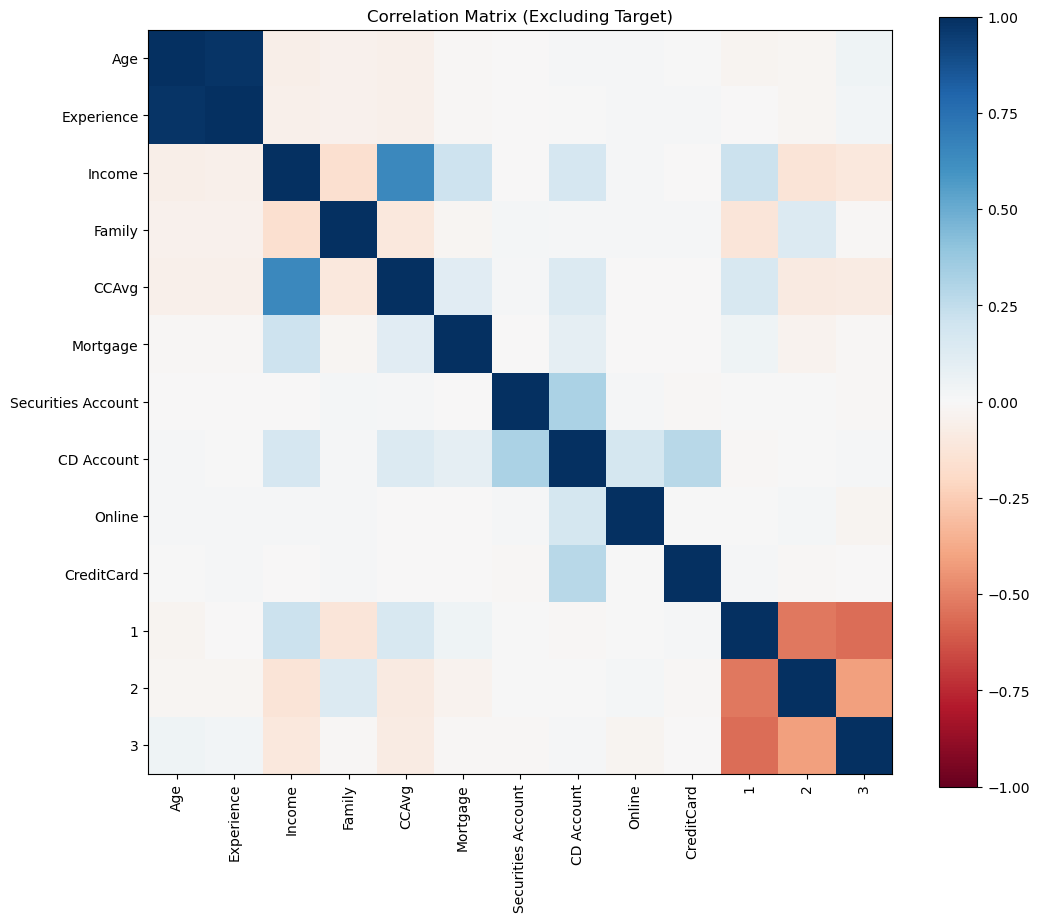

In [33]:

features_without_target = df.drop(columns=['Personal Loan'])

# Compute the correlation matrix for features excluding the target
correlation_matrix = features_without_target.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='RdBu', vmin= -1, vmax= 1)
plt.colorbar()
plt.title('Correlation Matrix (Excluding Target)')
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.savefig('Correlation Analysis.jpg') 
plt.show()





In [34]:
print(correlation_matrix)

                         Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.976630 -0.055269 -0.046418 -0.052012   
Experience          0.976630    1.000000 -0.049072 -0.045403 -0.048685   
Income             -0.055269   -0.049072  1.000000 -0.157501  0.645984   
Family             -0.046418   -0.045403 -0.157501  1.000000 -0.109275   
CCAvg              -0.052012   -0.048685  0.645984 -0.109275  1.000000   
Mortgage           -0.012539   -0.013404  0.206806 -0.020445  0.109905   
Securities Account -0.000436   -0.000454 -0.002616  0.019994  0.015086   
CD Account          0.008043    0.005449  0.169738  0.014110  0.136534   
Online              0.013702    0.013447  0.014206  0.010354 -0.003611   
CreditCard          0.007681    0.008830 -0.002385  0.011588 -0.006689   
1                  -0.027770   -0.007549  0.218019 -0.118628  0.156979   
2                  -0.016264   -0.017334 -0.128364  0.139201 -0.090366   
3                   0.045838    0.0251

In [35]:
# Specify the correlation threshold
correlation_threshold = 0.7

# List to store highly correlated variables
highly_correlated_variables = []

# Loop through each column in the correlation matrix
for col in correlation_matrix.columns:
    # Find variables highly correlated with the current variable
    correlated_vars = correlation_matrix.index[correlation_matrix[col].abs() > correlation_threshold].tolist()
    
    # Exclude the current variable itself
    correlated_vars.remove(col)
    
    # Append the variables to the list
    highly_correlated_variables.extend(correlated_vars)

# Remove duplicates from the list
highly_correlated_variables = list(set(highly_correlated_variables))

# Print the highly correlated variables
for variable in highly_correlated_variables:
    print(f"{variable} has a correlation coefficient above {correlation_threshold:.2f} with at least one variable.")

Experience has a correlation coefficient above 0.70 with at least one variable.
Age has a correlation coefficient above 0.70 with at least one variable.


In [36]:

# Check if 'Experience' is in the columns
if 'Experience' in df.columns:
    # Drop the 'Experience' column if it exists
    df = df.drop('Experience', axis=1)
    print("'Experience' column has been dropped.")
else:
    print("'Experience' column not found in the dataset.")



'Experience' column has been dropped.


# Data Splitting

In [37]:
from sklearn.model_selection import train_test_split

# Assuming your features are stored in X and the target variable is in y
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4000, 12)
X_test shape: (1000, 12)
y_train shape: (4000,)
y_test shape: (1000,)


In [38]:
X_train.head

<bound method NDFrame.head of       Age     Income  Family  CCAvg  Mortgage  Securities Account  CD Account  \
4227   32   9.250000       1    3.8         0                   1           0   
4676   39   5.666667       3    2.1         0                   1           0   
800    31  14.416667       1    6.0         0                   0           0   
3671   50   1.500000       1    0.4         0                   0           0   
4193   62   2.583333       3    0.2         0                   0           0   
...   ...        ...     ...    ...       ...                 ...         ...   
4426   33  11.666667       1    4.6         0                   0           0   
466    25   1.083333       2    0.9         0                   0           0   
3092   43   9.416667       2    0.4       325                   1           0   
3772   35  12.666667       2    3.0         0                   0           0   
860    57   2.500000       2    0.7       145                   0           0  

In [39]:
y_train.head

<bound method NDFrame.head of 4227    0
4676    0
800     0
3671    0
4193    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Personal Loan, Length: 4000, dtype: int64>

In [40]:
print(y_train.value_counts())

Personal Loan
0    3625
1     375
Name: count, dtype: int64


# Target Variable Distribution&Upsampling

In [41]:
#vcheck for imbalance with the Target Variable.
import pandas as pd
class_counts = y_train.value_counts()
# Display class distribution
print("Class Distribution:")
print(class_counts)
# Calculate imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print("Imbalance Ratio:", imbalance_ratio)

Class Distribution:
Personal Loan
0    3625
1     375
Name: count, dtype: int64
Imbalance Ratio: 9.666666666666666


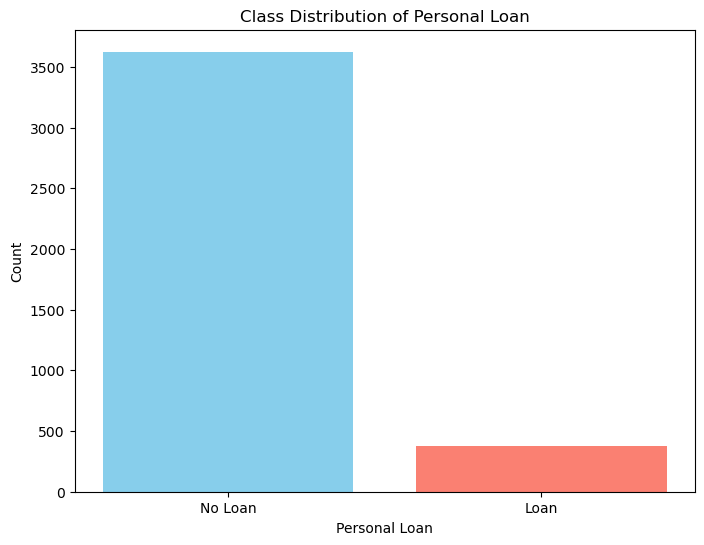

In [42]:
class_labels = ['No Loan', 'Loan']
class_counts = [sum(y_train == 0), sum(y_train == 1)]  # Count occurrences of each class

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['skyblue', 'salmon'])
plt.title('Class Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Upsampling Using SMOTE

In [43]:

X_train.columns = X_train.columns.astype(str)
# Initialize SMOTE with a desired sampling strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Upsample the minority class in the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [44]:
class_counts_SMOTE = y_train.value_counts()

print(class_counts_SMOTE)

Personal Loan
0    3625
1    3625
Name: count, dtype: int64


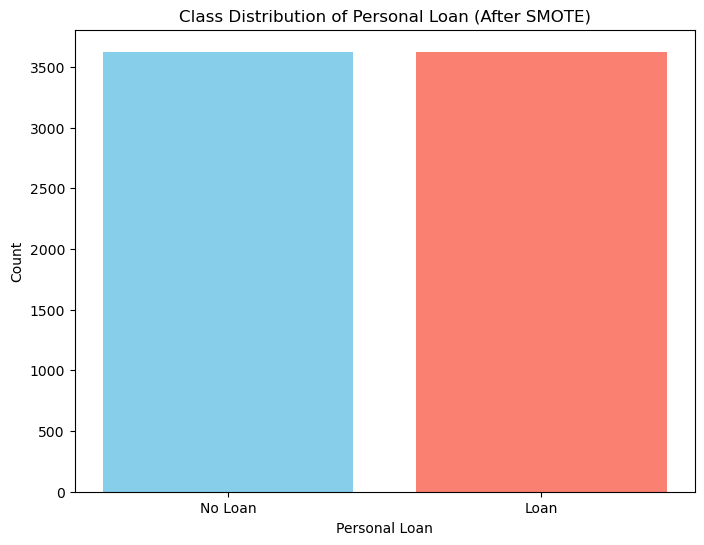

In [45]:
class_labels = ['No Loan', 'Loan']
class_counts = [sum(y_train == 0), sum(y_train == 1)]  # Count occurrences of each class

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['skyblue', 'salmon'])
plt.title('Class Distribution of Personal Loan (After SMOTE)')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('Upsample.jpg')
plt.show()

In [46]:
X_train.dtypes

Age                     int64
Income                float64
Family                  int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
1                       int32
2                       int32
3                       int32
dtype: object

In [47]:

# Convert NumPy arrays to Pandas DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Convert column names to strings for both X_train and X_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)





In [48]:

y_train_df = pd.DataFrame(y_train)
y_train_df.columns = y_train_df.columns.astype(str)



# Normalisation

In [49]:
# Normalize your oversampled train set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train)
X_test_scaled = pd.DataFrame(X_test)
 
# Display the first few rows of the scaled training data to see how the features were normalized
print("Scaled Training Data:")
print(X_train_scaled.head())
 
# Display the first few rows of the scaled testing data to see how the features were normalized
print("\nScaled Testing Data:")
print(X_test_scaled.head())

Scaled Training Data:
         0         1         2     3    4    5    6    7    8    9    10   11
0  0.204545  0.476852  0.000000  0.38  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0
1  0.363636  0.277778  0.666667  0.21  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0
2  0.181818  0.763889  0.000000  0.60  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
3  0.613636  0.046296  0.000000  0.04  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
4  0.886364  0.106481  0.666667  0.02  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0

Scaled Testing Data:
         0         1         2     3         4    5    6    7    8    9    10  \
0  0.159091  0.125000  0.333333  0.03  0.000000  1.0  0.0  0.0  1.0  0.0  1.0   
1  0.545455  0.652778  1.000000  0.61  0.000000  0.0  0.0  0.0  1.0  1.0  0.0   
2  0.159091  0.523148  0.333333  0.31  0.661264  0.0  0.0  1.0  0.0  1.0  0.0   
3  0.181818  0.250000  0.000000  0.10  0.000000  1.0  0.0  1.0  0.0  1.0  0.0   
4  0.886364  0.101852  0.666667  0.07  0.000000  0.0  0.0  1.0  0.0  0.0  1.0   

 

# Machine Learning Algorithms

## Decision Tree Classifier

In [51]:
#Decision Tree Classifier Using Gini Index and Entropy
#using Gini Index
# Creating the Decision Tree classifer object with splitting criterion as Gini index, the maximum depth of the tree is 3.
DTC = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


In [52]:
# Training Decision Tree Classifer
DTC = DTC.fit(X_train, y_train)
Y_predict_gini_test = DTC.predict(X_test)


In [53]:
# Calculating accuracy
accuracy_gini = accuracy_score(y_test, Y_predict_gini_test)
print("Accuracy:", accuracy_gini)

Accuracy: 0.957


In [54]:
#Apply grid search here

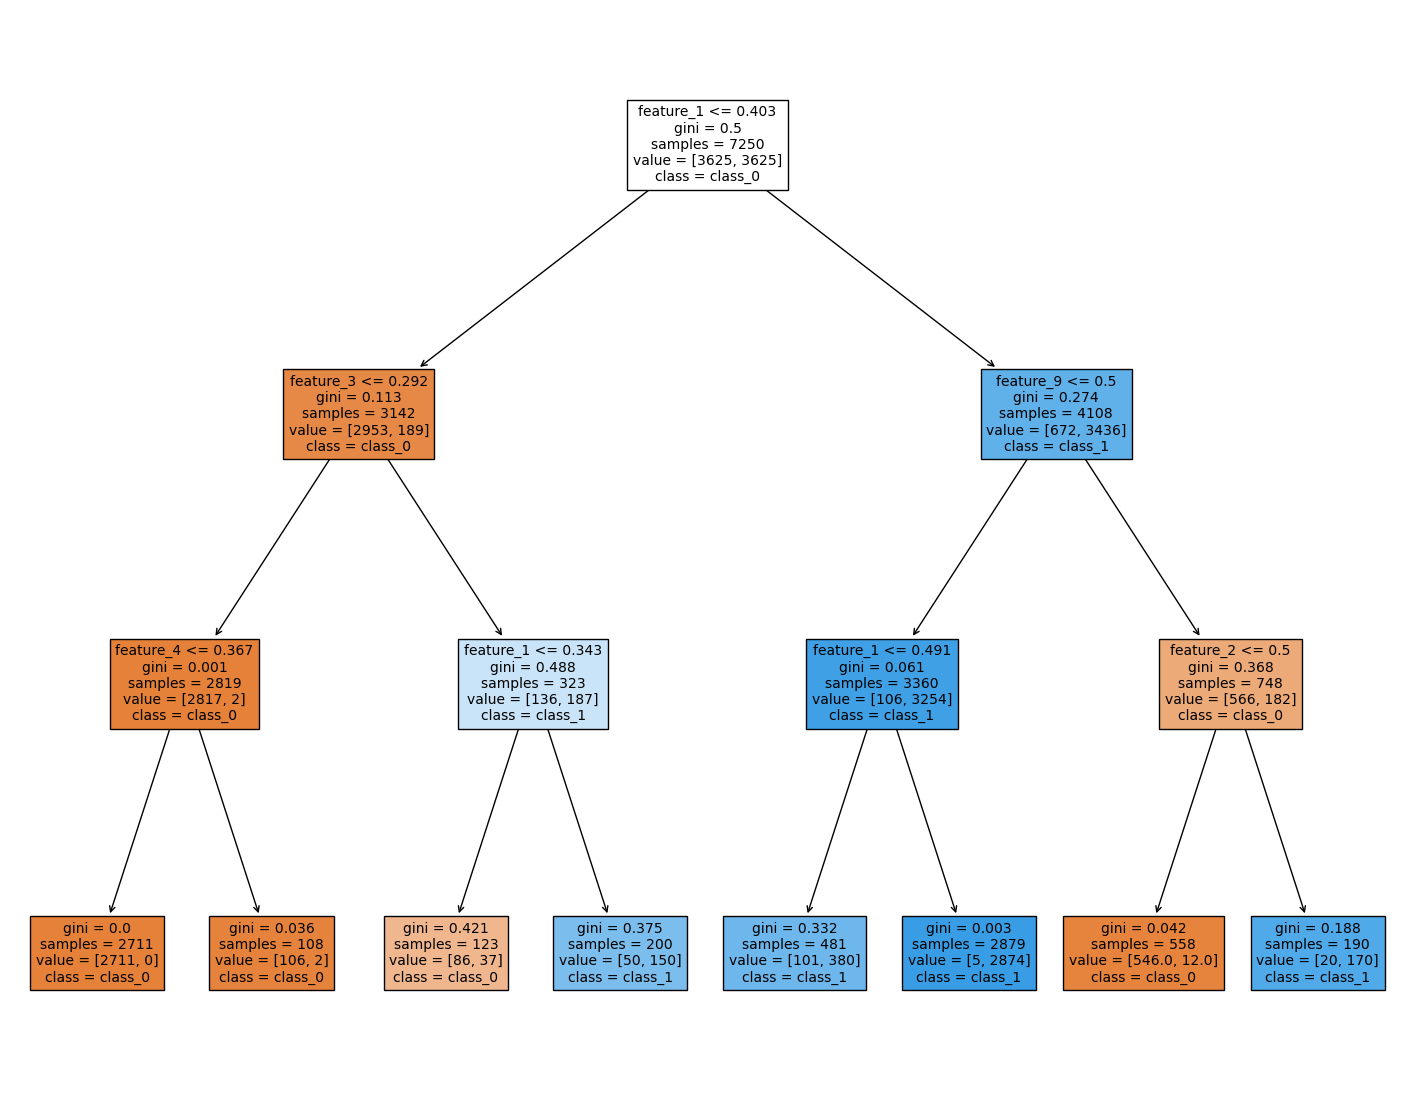

In [55]:


# Creating the Decision Tree classifier object with splitting criterion as Gini index, the maximum depth of the tree is 3.
DTC = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

DTC.fit(X_train, y_train)

# Get feature names based on the dimensions of X_train
n_features = X_train.shape[1]
feature_names = [f"feature_{i}" for i in range(n_features)]

# Plotting Gini Tree with larger dimensions and adjusted font size
plt.figure(figsize=(18, 14))  # Adjust dimensions as needed
plot_tree(DTC, filled=True, feature_names=feature_names, class_names=['class_0', 'class_1'], fontsize=10)
plt.savefig('Decision_tree_gini_plot.jpg') 
plt.show()







In [56]:
#Predicting the accuracy on train set for comparision 
Y_predict_gini_train = DTC.predict(X_train)

In [57]:
Y_predict_gini_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
print("Accuracy with gini index:",metrics.accuracy_score(y_test, Y_predict_gini_test))
print("Accuracy on training data (using Gini index criterion):", metrics.accuracy_score(y_train, Y_predict_gini_train))

Accuracy with gini index: 0.957
Accuracy on training data (using Gini index criterion): 0.9686896551724138


In [59]:
# Print classification report
print("Decision Tree Classification Report (Using Gini Index) on Test Data:")
print(classification_report(y_test, Y_predict_gini_test))
print("Decision Tree Classification Report (Using Gini Index) on Train Data:")
print(classification_report(y_train, Y_predict_gini_train))

Decision Tree Classification Report (Using Gini Index) on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       895
           1       0.72      0.97      0.83       105

    accuracy                           0.96      1000
   macro avg       0.86      0.96      0.90      1000
weighted avg       0.97      0.96      0.96      1000

Decision Tree Classification Report (Using Gini Index) on Train Data:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3625
           1       0.95      0.99      0.97      3625

    accuracy                           0.97      7250
   macro avg       0.97      0.97      0.97      7250
weighted avg       0.97      0.97      0.97      7250



In [60]:

# Train a Decision Tree classifier with Gini criterion
dt_gini_model = DecisionTreeClassifier(criterion='gini')
dt_gini_model.fit(X_train, y_train)

# Predicting on the test set using the trained Decision Tree (Gini) model
y_pred_dt_gini = dt_gini_model.predict(X_test)

# Calculating accuracy
accuracy_dt_gini = accuracy_score(y_test, y_pred_dt_gini)
print("Accuracy_dt_gini:", accuracy_dt_gini)

# Calculating precision
precision_dt_gini = precision_score(y_test, y_pred_dt_gini)
print("Precision_dt_gini:", precision_dt_gini)

# Calculating recall
recall_dt_gini = recall_score(y_test, y_pred_dt_gini)
print("Recall_dt_gini:", recall_dt_gini)

# Calculating F1 score
f1_dt_gini = f1_score(y_test, y_pred_dt_gini)
print("F1 Score_dt_gini:", f1_dt_gini)


Accuracy_dt_gini: 0.984
Precision_dt_gini: 0.8869565217391304
Recall_dt_gini: 0.9714285714285714
F1 Score_dt_gini: 0.9272727272727272


# Confusion Matrix(Gini)

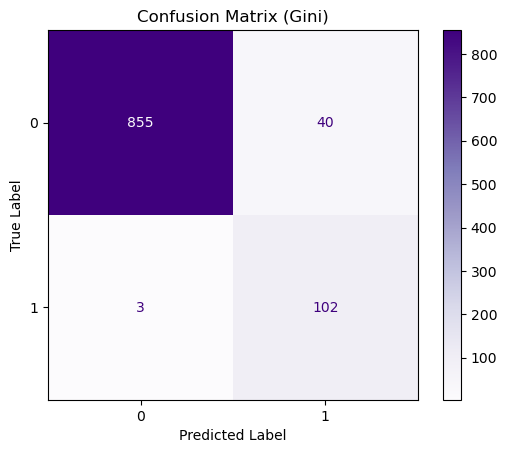

In [61]:
# Display the confusion matrix for the model
cm_gini = metrics.confusion_matrix(y_test, Y_predict_gini_test)
disp_gini = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gini)
disp_gini.plot(cmap='Purples')  
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




# Precision-Recall(Gini)

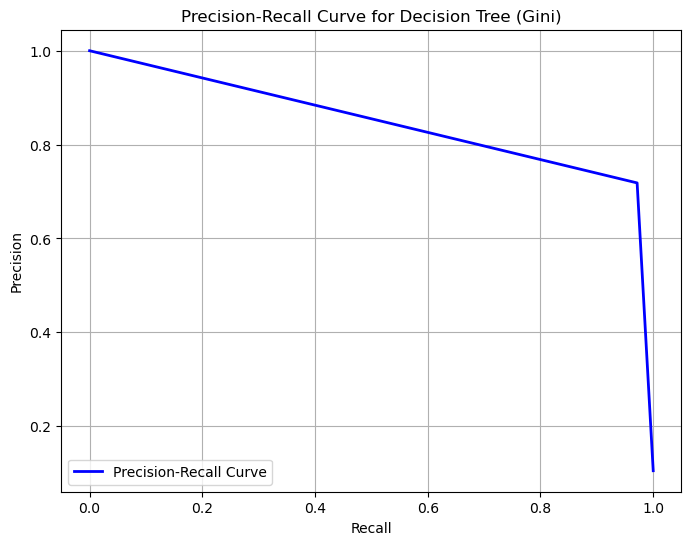

In [62]:

# Get precision, recall, and thresholds
precision_gini, recall_gini, thresholds_gini = precision_recall_curve(y_test, Y_predict_gini_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_gini, precision_gini, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree (Gini)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# Roc Curve(Gini)

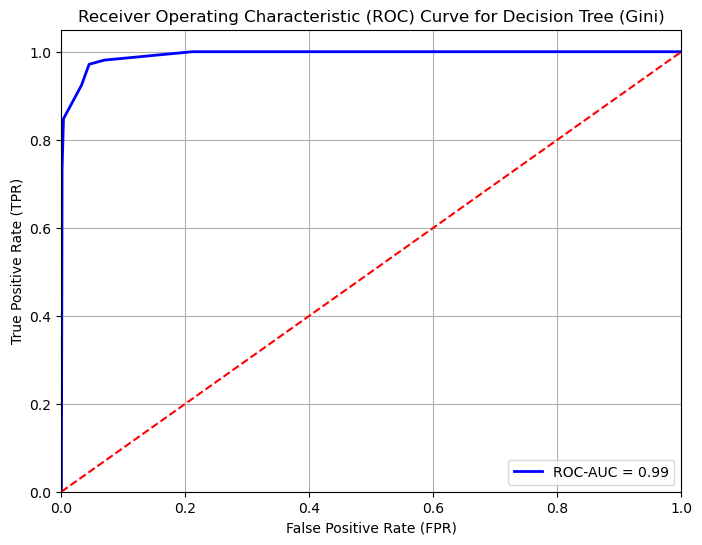

In [63]:

# Get predicted probabilities for the positive class
Y_pred_proba_gini = DTC.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr_gini, tpr_gini, thresholds_gini = roc_curve(y_test, Y_pred_proba_gini)

# Calculate ROC-AUC score
roc_auc_gini = roc_auc_score(y_test, Y_pred_proba_gini)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, color='blue', lw=2, label=f'ROC-AUC = {roc_auc_gini:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree (Gini)')
plt.legend(loc='lower right')  # Display ROC-AUC score in the legend
plt.grid(True)
plt.show()

In [64]:
#Decision Tree classifier using Entropy
# Creating the Decision Tree classifier object with splitting criterion as Entropy, the maximum depth of the tree is 3.
DTC_Entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Training Decision Tree Classifier
DTC_Entropy = DTC_Entropy.fit(X_train, y_train)



In [65]:
#Predicting the accuracy on test set for comparision 
Y_predict_Entropy = DTC_Entropy.predict(X_test)

In [66]:
# Print classification report
print("Decision Tree Classification Report (Using Entropy) on Test Data:")
print(classification_report(y_test, Y_predict_Entropy))


Decision Tree Classification Report (Using Entropy) on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       895
           1       0.65      0.97      0.78       105

    accuracy                           0.94      1000
   macro avg       0.82      0.95      0.87      1000
weighted avg       0.96      0.94      0.95      1000



In [67]:

# Assuming you have already defined and split your data into X_train, X_test, y_train, and y_test

# Train a Decision Tree classifier with Entropy criterion
dt_entropy_model = DecisionTreeClassifier(criterion='entropy')
dt_entropy_model.fit(X_train, y_train)

# Predicting on the test set using the trained Decision Tree (Entropy) model
y_pred_dt_entropy = dt_entropy_model.predict(X_test)

# Calculating accuracy
accuracy_dt_entropy = accuracy_score(y_test, y_pred_dt_entropy)
print("Accuracy_dt_entropy:", accuracy_dt_entropy)

# Calculating precision
precision_dt_entropy = precision_score(y_test, y_pred_dt_entropy)
print("Precision_dt_entropy:", precision_dt_entropy)

# Calculating recall
recall_dt_entropy = recall_score(y_test, y_pred_dt_entropy)
print("Recall_dt_entropy:", recall_dt_entropy)

# Calculating F1 score
f1_dt_entropy = f1_score(y_test, y_pred_dt_entropy)
print("F1 Score_dt_entropy:", f1_dt_entropy)


Accuracy_dt_entropy: 0.99
Precision_dt_entropy: 0.9357798165137615
Recall_dt_entropy: 0.9714285714285714
F1 Score_dt_entropy: 0.9532710280373832


# Confusion Matrix for Decision Tree(Entropy)

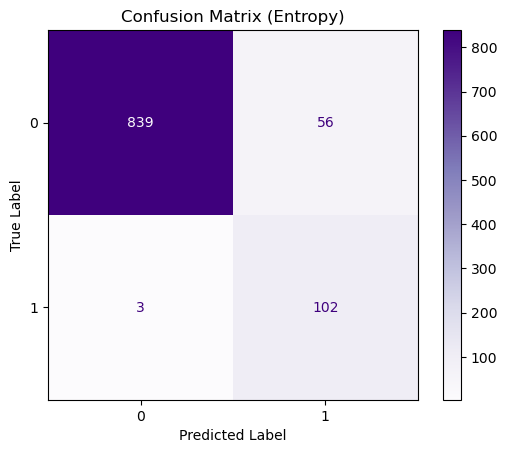

In [68]:
# Display the confusion matrix for the model
cm_Entropy = metrics.confusion_matrix(y_test, Y_predict_Entropy)
disp_Entropy = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_Entropy)
disp_Entropy.plot(cmap='Purples')  
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


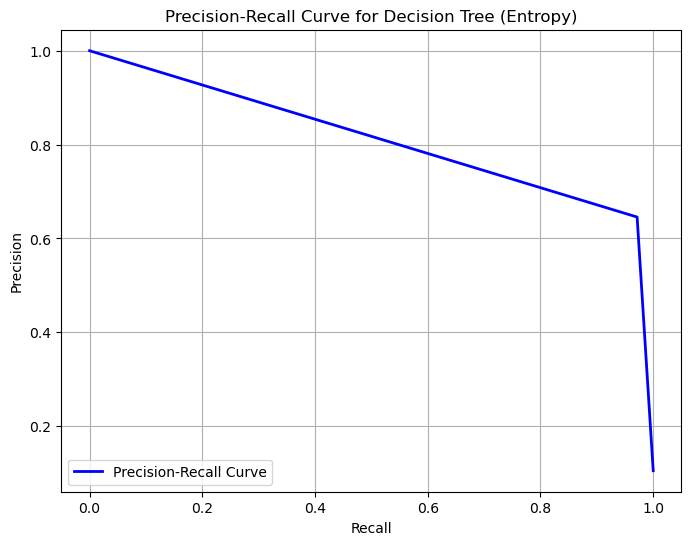

In [69]:

# Get precision, recall, and thresholds
precision_entropy, recall_entropy, thresholds_entropy = precision_recall_curve(y_test, Y_predict_Entropy)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_entropy, precision_entropy, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree (Entropy)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# Roc Curve For Decision Tree(Entropy)

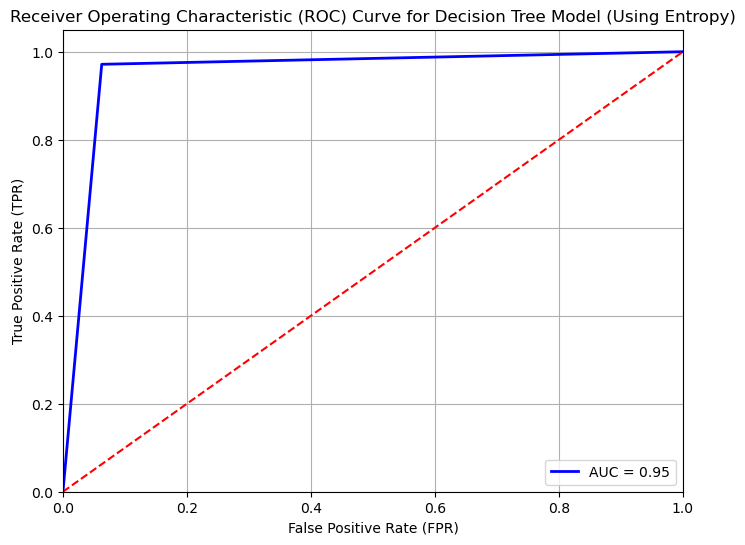

In [70]:

fpr, tpr, thresholds = roc_curve(y_test, Y_predict_Entropy)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, Y_predict_Entropy)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Model (Using Entropy)')
plt.legend(loc='lower right')  # Display AUC score in the legend
plt.grid(True)
plt.savefig('Receiver_Operating_Characteristic_ROC_Curve_Decision_Tree_Model_Using_Entropy.jpg')
plt.show()


## Logistic Regression

In [71]:
# Train a Logistic Regression Model (using the default parameters)
log_model = LogisticRegression(random_state=16, max_iter=1000)

# Fit the model with data
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=16)

In [72]:
y_pred_log = log_model.predict(X_test)

In [73]:
#printing accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)
# Print classification report
print("Logistic Regression Classification Report before optimisation:")
print(classification_report(y_test, y_pred_log))
plt.show()


Accuracy: 0.944
Precision: 0.6870229007633588
Recall: 0.8571428571428571
F1 Score: 0.7627118644067796
Logistic Regression Classification Report before optimisation:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       895
           1       0.69      0.86      0.76       105

    accuracy                           0.94      1000
   macro avg       0.83      0.91      0.87      1000
weighted avg       0.95      0.94      0.95      1000



In [74]:

# Convert NumPy arrays to Pandas DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Convert column names to strings for both X_train and X_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep) 
plt.show()


Accuracy: 0.944
Confusion Matrix:
 [[854  41]
 [ 15  90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       895
           1       0.69      0.86      0.76       105

    accuracy                           0.94      1000
   macro avg       0.83      0.91      0.87      1000
weighted avg       0.95      0.94      0.95      1000



# Optimization Of Logistic Regression

In [75]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty type
    'solver': ['liblinear', 'saga']        # Solver algorithm
}

In [76]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Creating a logistic regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=16)
# The GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
# Performing grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=16),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [77]:
# Printing the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [78]:
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

In [79]:

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_best)
precision_logreg = precision_score(y_test, y_pred_best)
recall_logreg = recall_score(y_test, y_pred_best)
f1_logreg = f1_score(y_test, y_pred_best)  # Using y_test instead of Y_test
print("Accuracy of best model:", accuracy_logreg)
print("Precision of best model:", precision_logreg)
print("Recall of best model:", recall_logreg)
print("F1 of best model:", f1_logreg)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy of best model: 0.947
Precision of best model: 0.7
Recall of best model: 0.8666666666666667
F1 of best model: 0.774468085106383
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       895
           1       0.70      0.87      0.77       105

    accuracy                           0.95      1000
   macro avg       0.84      0.91      0.87      1000
weighted avg       0.95      0.95      0.95      1000



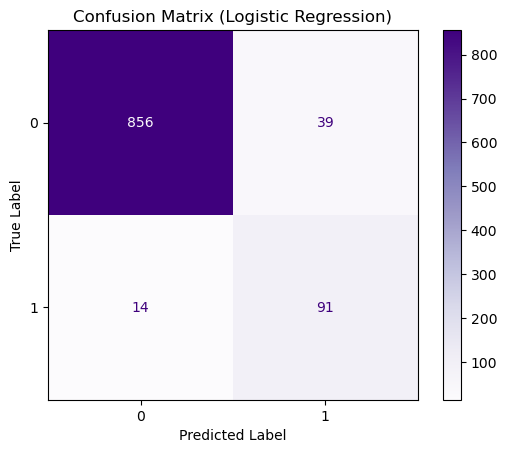

In [80]:
# Plot the confusion matrix for the Logistic Regression Model
cm_log = confusion_matrix(y_test, y_pred_best)
disp_log = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap='Purples') 
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('Confusion Matrix for Logistic Regression.jpg')
plt.show()


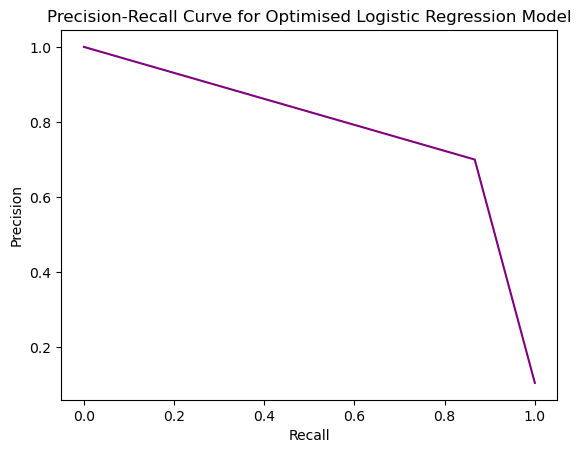

In [81]:
# Calculate Precision and Recall for the optimized model
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, y_pred_best)
# Create Precision-Recall Curve
fig, ax = plt.subplots()
ax.plot(recall_best, precision_best, color='purple')
# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve for Optimised Logistic Regression Model')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
# Save the plot as an image file and display
plt.savefig('Precision-Recall Curve for Optimised Logistic Regression Model.jpg')
plt.show()

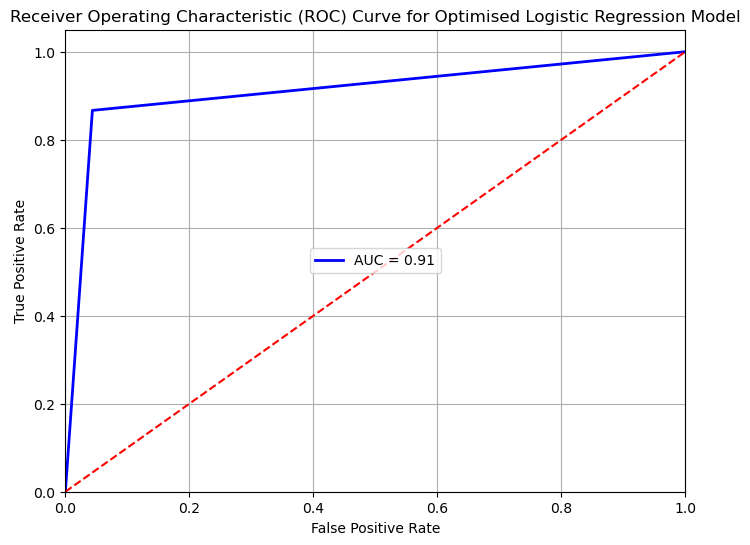

In [82]:
# Calculate False Positive Rate, True Positive Rate, and Thresholds for the optimized model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_best)
# Calculate the AUC score for the optimized model
auc_score_best = roc_auc_score(y_test, y_pred_best)
# Plot ROC curve for the optimized model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label=f'AUC = {auc_score_best:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimised Logistic Regression Model')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for Optimised Logistic Regression Model.jpg')
plt.show()

# Naive Bayes


In [83]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [84]:
nb_model.fit(X_train, y_train)


GaussianNB()

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [86]:
y_pred_nb = nb_model.predict(X_test)

In [87]:
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       895
           1       0.66      0.77      0.71       105

    accuracy                           0.93      1000
   macro avg       0.82      0.86      0.84      1000
weighted avg       0.94      0.93      0.94      1000



In [88]:

# Train a Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting on the test set using the trained Naive Bayes model
y_pred = nb_model.predict(X_test)

# Calculating accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy_nb:", accuracy_nb)

# Calculating precision
precision_nb = precision_score(y_test, y_pred)
print("Precision_nb:", precision_nb)

# Calculating recall
recall_nb = recall_score(y_test, y_pred)
print("Recall_nb:", recall_nb)

# Calculating F1 score
f1_nb = f1_score(y_test, y_pred)
print("F1 Score_nb:", f1_nb)


Accuracy_nb: 0.934
Precision_nb: 0.6585365853658537
Recall_nb: 0.7714285714285715
F1 Score_nb: 0.7105263157894737


In [89]:
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_mat_nb)


Confusion Matrix:
[[853  42]
 [ 24  81]]


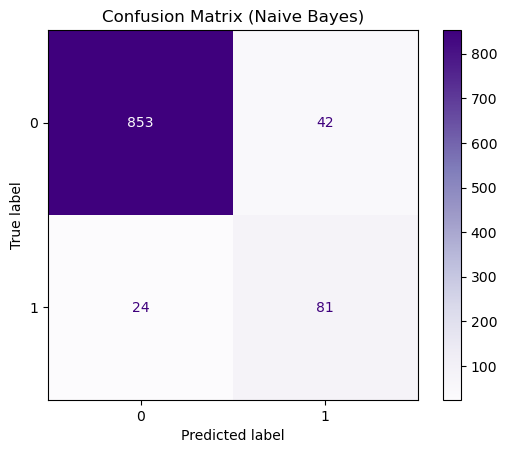

In [90]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
# Display the confusion matrix
disp_nb = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap='Purples')
# Customize the plot with true positives, false positives, true negatives, and false negatives
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

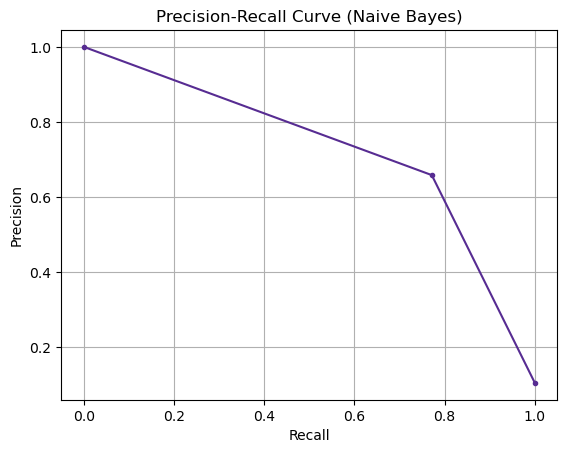

In [91]:

# Calculate precision and recall values
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_pred_nb)

# Plot precision-recall curve
plt.plot(recall_nb, precision_nb, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Naive Bayes)')
plt.grid(True)
plt.show()


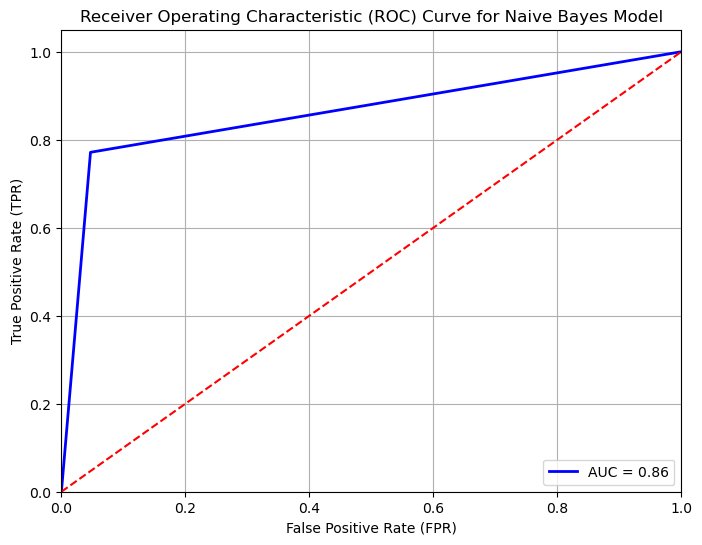

In [92]:


fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
auc_score_nb = roc_auc_score(y_test, y_pred_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'AUC = {auc_score_nb:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes Model')
plt.legend(loc='lower right')  # Display AUC score in the legend
plt.grid(True)
plt.show()


# Random Forest Classifier


In [93]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [94]:
y_pred = model.predict(X_test)


In [95]:
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')


In [96]:

# Assuming you have already defined and split your data into X_train, X_test, y_train, and y_test

# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predicting on the test set using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy_rf:", accuracy_rf)

# Calculating precision
precision_rf = precision_score(y_test, y_pred_rf)
print("Precision_rf:", precision_rf)

# Calculating recall
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall_rf:", recall_rf)

# Calculating F1 score
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score_rf:", f1_rf)


Accuracy_rf: 0.991
Precision_rf: 0.9615384615384616
Recall_rf: 0.9523809523809523
F1 Score_rf: 0.9569377990430622


In [97]:
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)


Confusion Matrix:
[[892   3]
 [  5 100]]


In [98]:
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.97      0.95      0.96       105

    accuracy                           0.99      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



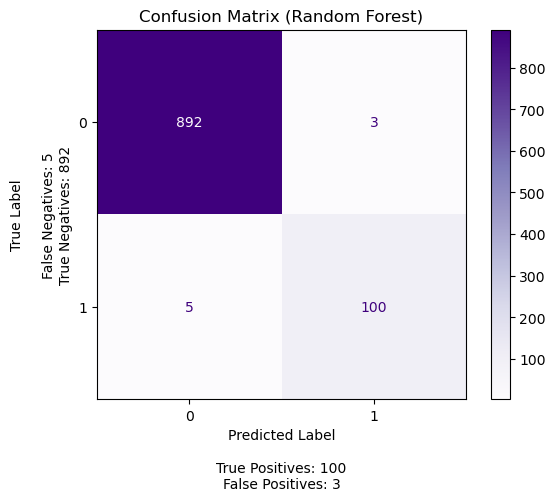

In [99]:

# Assuming y_pred contains the predicted labels and y_test contains the true labels for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)

# Extract values for true positives, false positives, true negatives, and false negatives
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Purples')

# Customize the plot with true positives, false positives, true negatives, and false negatives
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel(f'Predicted Label\n\nTrue Positives: {tp_rf}\nFalse Positives: {fp_rf}')
plt.ylabel(f'True Label\n\nFalse Negatives: {fn_rf}\nTrue Negatives: {tn_rf}')
plt.show()


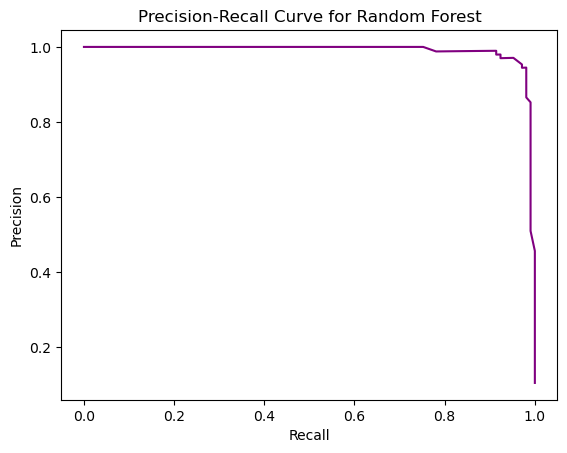

In [100]:

best_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Instantiate the Random Forest model
best_rf.fit(X_train, y_train)  # Train the model on your training data



# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])

# Create Precision-Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve for Random Forest')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.savefig('Precision-Recall Curve for Random Forest.jpg')
plt.show()


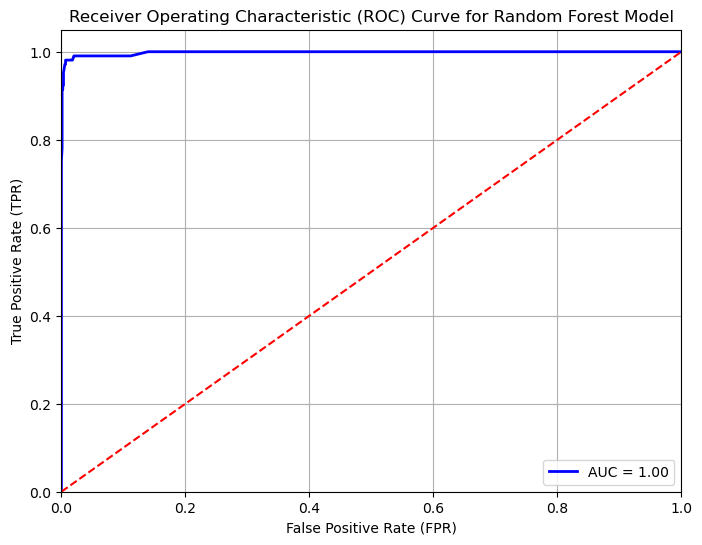

In [101]:

y_pred_proba_rf = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculate the AUC score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {auc_score_rf:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Model')
plt.legend(loc='lower right')  # Display AUC score in the legend
plt.grid(True)
plt.show()



# knn


In [102]:
# Initialize the KNN classifier
knn_model = KNeighborsClassifier()


In [103]:
# Train the model on the training data
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [104]:
#Evaluating the performance of the model using the test set
knn_Y_predict = knn_model.predict(X_test)

In [105]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_Y_predict))

Accuracy: 0.964


In [106]:
# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test,knn_Y_predict))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       895
           1       0.85      0.80      0.82       105

    accuracy                           0.96      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.96      0.96      0.96      1000



# Optimising the KNN Model

In [107]:
# Defining the range of values for n_neighbors
neighbors = np.arange(1, 36)

In [108]:
# Create an empty list to store the accuracy at different values of K
KNN_accuracy = []

In [109]:
# Loop through each value of n_neighbors and perform grid search
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    grid_search = GridSearchCV(knn, {'n_neighbors': [k]}, cv=5)
    grid_search.fit(X_train, y_train)
    KNN_accuracy.append(grid_search.best_score_)

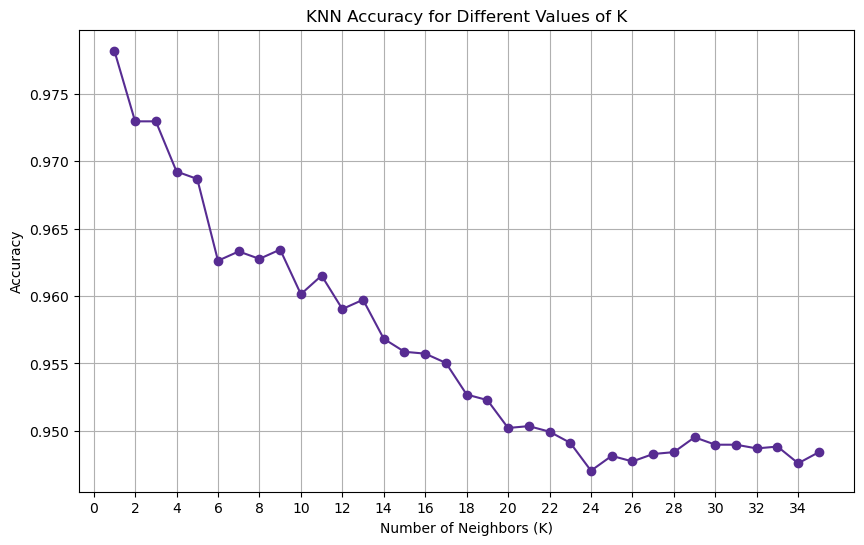

In [110]:
# Plot the mean test scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, KNN_accuracy, marker='o')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(0, 36, step=2))
plt.savefig('KNN Accuracy for Different Values of K.jpg')
plt.show()

In [111]:
best_index = np.argmax(KNN_accuracy)
best_k = neighbors[best_index]

print(f"The best value of n_neighbors (K) is: {best_k}")

The best value of n_neighbors (K) is: 1


In [112]:
knn= KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
best_k_predictions = knn.predict(X_test)

In [113]:
# Calculate precision and recall for the best K value
accuracy_knn = accuracy_score(y_test, best_k_predictions)
precision_knn = precision_score(y_test, best_k_predictions)
recall_knn = recall_score(y_test, best_k_predictions)
f1_knn = f1_score(y_test, best_k_predictions)
# Print the accuracy, precision, and recall for the best K value
print(f"Best K value: {best_k}")
print(f"Accuracy for best K value: {accuracy_knn}")
print(f"Precision for best K value: {precision_knn}")
print(f"Recall for best K value: {recall_knn}")
print(f"F1 Score for best K value: {f1_knn}")

# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test ,best_k_predictions))

Best K value: 1
Accuracy for best K value: 0.967
Precision for best K value: 0.8461538461538461
Recall for best K value: 0.8380952380952381
F1 Score for best K value: 0.8421052631578947
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       895
           1       0.85      0.84      0.84       105

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000



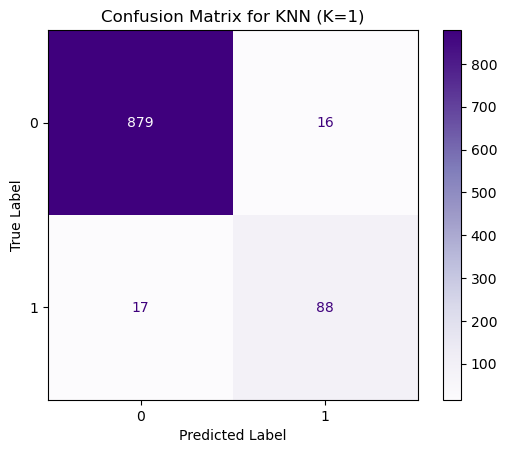

In [114]:
# Plot the confusion matrix for the KNN Model
cm_knn = confusion_matrix(y_test, best_k_predictions)
disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn);
disp_knn.plot(cmap='Purples')  
plt.title(f'Confusion Matrix for KNN (K={best_k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('Confusion Matrix for KNN.jpg')
plt.show()

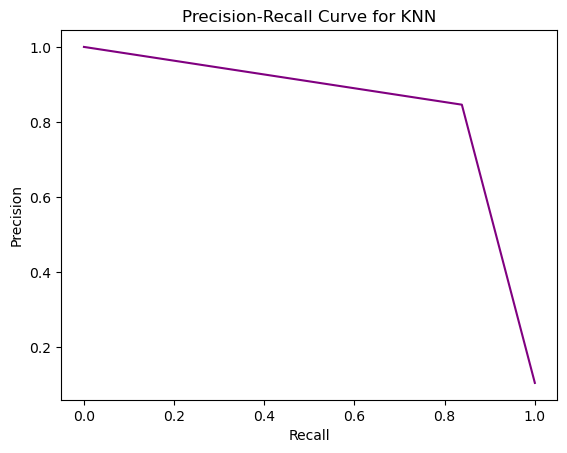

In [115]:
# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
# Create Precision Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve for KNN')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.savefig('Precision-Recall Curve for KNN.jpg')
plt.show()

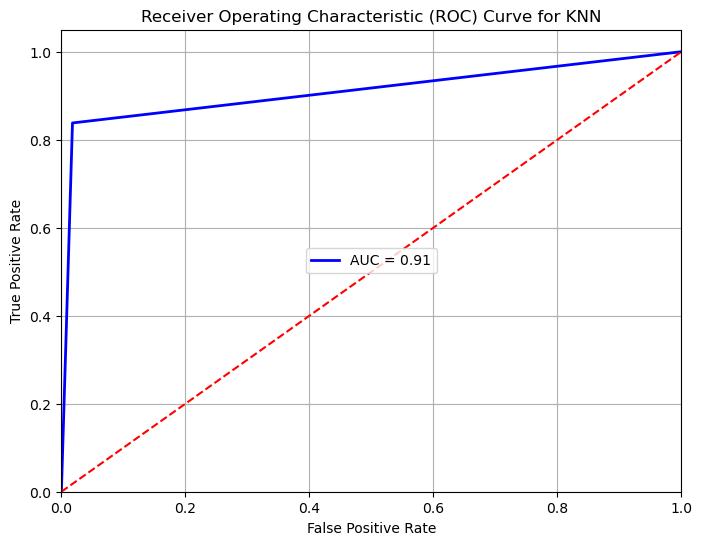

In [116]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, best_k_predictions)
# Calculate the AUC score
auc_score = roc_auc_score(y_test, best_k_predictions)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for KNN.jpg')
plt.show()

In [117]:
print(precision_rf)
print(precision_knn)
print(precision_nb)


0.9615384615384616
0.8461538461538461
[0.105      0.65853659 1.        ]


# Machine Learning Model Comparison

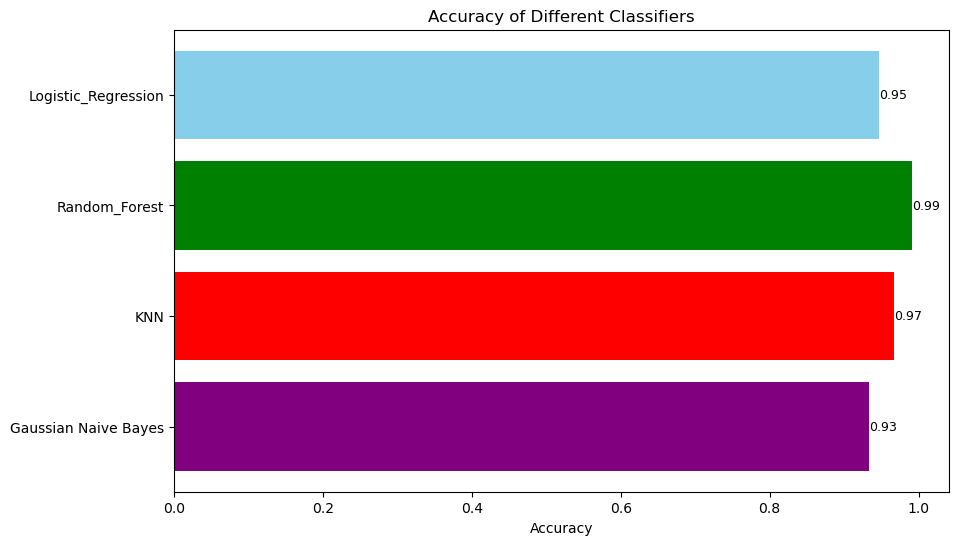

In [118]:
# Classifier names
classifiers = ['Logistic_Regression', 'Random_Forest', 'KNN', 'Gaussian Naive Bayes']
# Accuracy scores obtained from cross-validation or testing
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_knn, accuracy_nb]
# Define colors for each classifier
colors = ['skyblue', 'green', 'red', 'purple']
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracy_scores, color=colors)
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.gca().invert_yaxis()  
# Add labels on bars
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             va='center', ha='left', fontsize=9)
plt.savefig('Model Comparision.jpg')
plt.show()

# Receiver Operating Characteristics (ROC)-Comparison Model

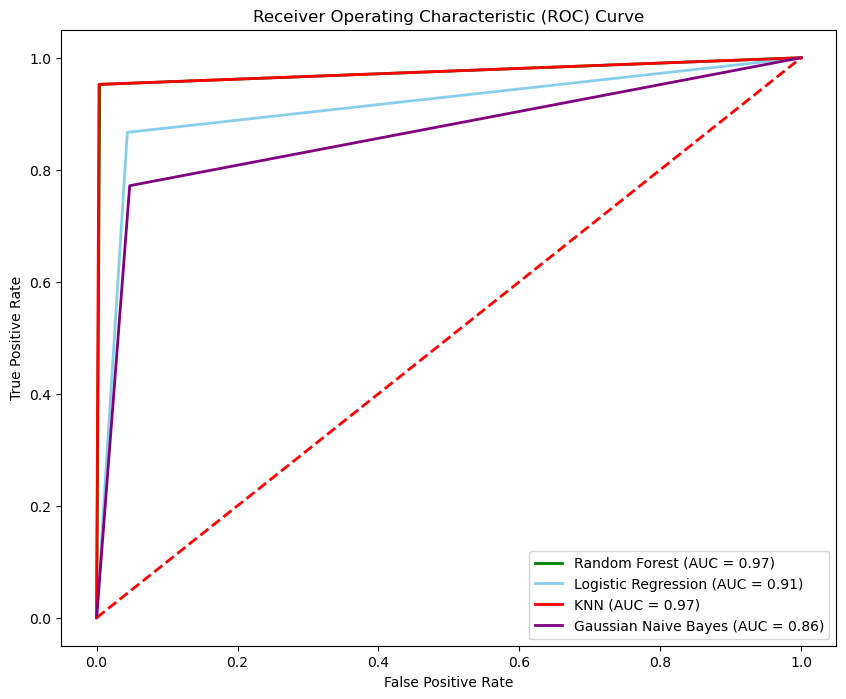

In [119]:
# Calculate ROC curves and AUC scores for each model
models = {
    'Random Forest': (y_pred_rf, 'green'),
    'Logistic Regression': (y_pred_best, 'skyblue'),
    'KNN': (y_pred, 'red'),
    'Gaussian Naive Bayes': (y_pred_nb, 'purple')
}

plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
for model_name, (y_pred, color) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)  # Corrected here
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})', color=color)

# Plot the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', lw=2)

# Add legend, labels, and title
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.savefig('Combined_ROC_Curve.png')
plt.show()


# Precision-Recall & F1 Comparison

                 Model Accuracy % Precision % Recall % F1-Score
0  Logistic Regression      0.94%      68.70%   85.71%     0.76
1        Random Forest      0.99%      96.15%   95.24%     0.96
2                  KNN      0.97%      84.62%   83.81%     0.84
3          Naive Bayes      0.93%      58.78%   59.05%     0.71


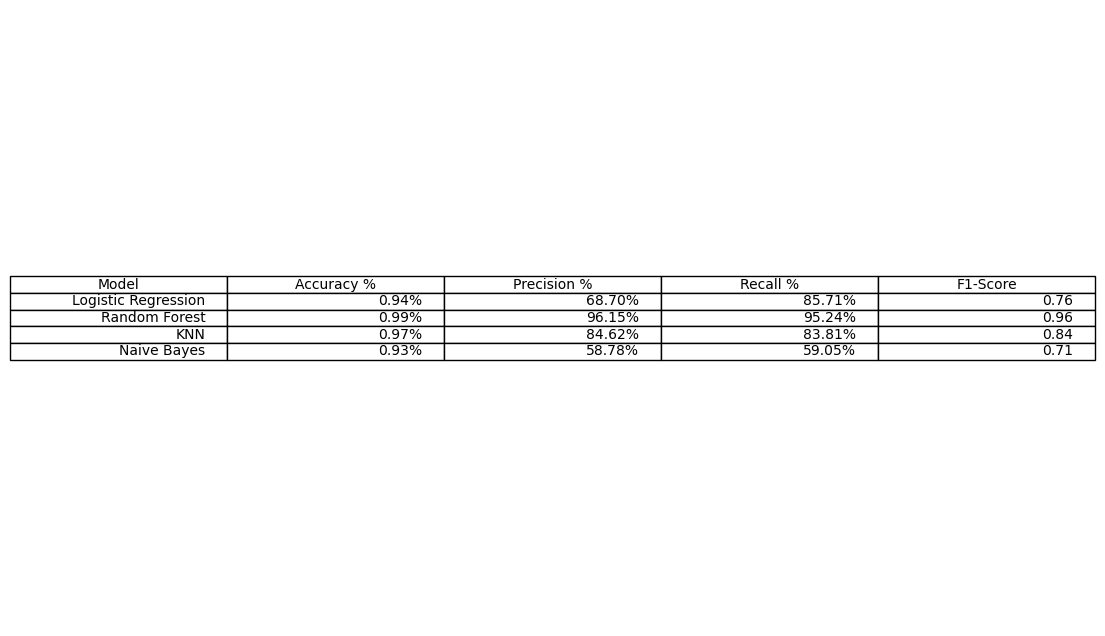

In [120]:

# Calculate average precision score for Naive Bayes
precision_nb_avg = np.mean(precision_nb)

# Calculate average recall score for Naive Bayes
recall_nb_avg = np.mean(recall_nb)

# Define the results dictionary
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes'],
    'Accuracy %': [accuracy_log, accuracy_rf, accuracy_knn, accuracy_nb],
    'Precision %': [precision_log * 100, precision_rf * 100, precision_knn * 100, precision_nb_avg * 100],  # Using average precision for Naive Bayes
    'Recall %': [recall_log * 100, recall_rf * 100, recall_knn * 100, recall_nb_avg * 100],  # Using average recall for Naive Bayes
    'F1-Score': [ f1_log, f1_rf, f1_knn, f1_nb]
}

# Convert accuracy, precision, recall scores to percentages and F1 scores to strings with 2 decimal places
results['Accuracy %'] = [f"{score:.2f}%" for score in results['Accuracy %']]
results['Precision %'] = [f"{score:.2f}%" for score in results['Precision %']]
results['Recall %'] = [f"{score:.2f}%" for score in results['Recall %']]
results['F1-Score'] = [f"{score:.2f}" for score in results['F1-Score']]

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Plot the DataFrame as a table with increased font size
fig, ax = plt.subplots(figsize=(14, 8))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center')

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)  

# Save the table as an image
plt.savefig('performance_metrics_table.jpg')
plt.show()


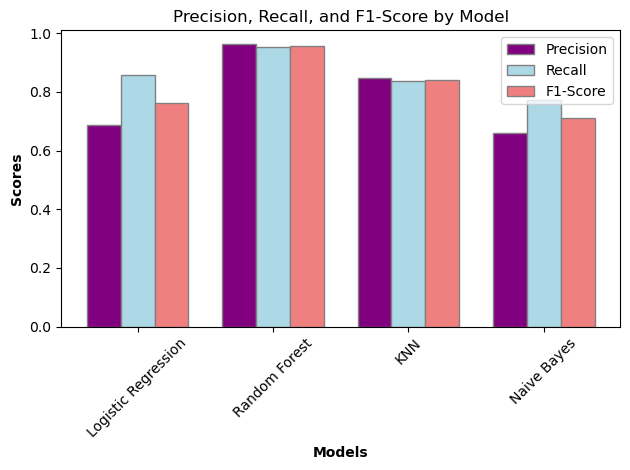

In [121]:

# Define data
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']
precision_scores = [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_rf), precision_score(y_test, best_k_predictions), precision_score(y_test, y_pred_nb)]
recall_scores = [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_rf), recall_score(y_test, best_k_predictions), recall_score(y_test, y_pred_nb)]
f1_scores = [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf), f1_score(y_test, best_k_predictions), f1_score(y_test, y_pred_nb)]

# Set the width of the bars
bar_width = 0.25
# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# Plot grouped bar chart with custom colors
plt.bar(r1, precision_scores, color='purple', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='lightblue', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='lightcoral', width=bar_width, edgecolor='grey', label='F1-Score')
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)
# Add labels and title
plt.ylabel('Scores', fontweight='bold')
plt.title('Precision, Recall, and F1-Score by Model')
# Add legend
plt.legend()
# Show plot
plt.tight_layout()
plt.savefig('PRF.jpg')
plt.show()
